In [34]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import string # this is used for string manipulations
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [35]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt= inaugural.raw('1941-Roosevelt.txt')
Kennedy= inaugural.raw('1961-Kennedy.txt')
Nixon= inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\Honey
[nltk_data]     Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [36]:
print('Natural Language Tool Kit version:',nltk.__version__)

Natural Language Tool Kit version: 3.6.5


In [37]:
speeches= [Roosevelt,Kennedy,Nixon]

In [38]:
df = pd.DataFrame(speeches)
df

,0
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [39]:
df.columns =['Speech']
df

,Speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [40]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

### Character count

In [41]:
df['char_count'] = df['Speech'].str.len()
df[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


### Word count 

In [42]:
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split(" ")))
df[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


### Numerics count

In [43]:
###number of numerics
df['numerics'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Speech','numerics']].head()

,Speech,numerics
0,On each national day of inauguration since 178...,2
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1


### Count of Upper case letters

In [44]:
##Number of uppercase letters
df['upper case letters'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Speech','upper case letters']].head()

,Speech,upper case letters
0,On each national day of inauguration since 178...,3
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",14


In [45]:
##Number of lowercase letters
df['lower case letters'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.islower()]))
df[['Speech','lower case letters']].head()

,Speech,lower case letters
0,On each national day of inauguration since 178...,1215
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1269
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1670


In [46]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [47]:
df[['Speech','lower case letters']].head()

,Speech,lower case letters
0,on each national day of inauguration since 178...,1215
1,"vice president johnson, mr. speaker, mr. chief...",1269
2,"mr. vice president, mr. speaker, mr. chief jus...",1670


### Count of Stop Words

In [48]:
from nltk.corpus import stopwords
stop = stopwords.words('english') +list(string.punctuation)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
df['Stopwords'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Speech','Stopwords']].head()

,Speech,Stopwords
0,on each national day of inauguration since 178...,694
1,"vice president johnson, mr. speaker, mr. chief...",660
2,"mr. vice president, mr. speaker, mr. chief jus...",958


In [60]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Speech'].head()

0    national day inauguration since 1789, people r...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [61]:
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split(" ")))
df[['Speech','word_count']].head()

,Speech,word_count
0,"national day inauguration since 1789, people r...",666
1,"vice president johnson, mr. speaker, mr. chief...",730
2,"mr. vice president, mr. speaker, mr. chief jus...",861


### Removal of punctuation

In [67]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]','')
df['Speech'].head()

C:\Users\HONEYS~1\AppData\Local\Temp/ipykernel_11336/1030745605.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Speech'] = df['Speech'].str.replace('[^\w\s]','')


0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

### Frequent Words in President's Speeches

In [79]:
freq = pd.Series(' '.join(df.Speech[0:1]).split()).value_counts()[:3]
freq

nation    11
know      10
spirit     9
dtype: int64

In [93]:
freq2 = pd.Series(' '.join(df.Speech[1:2]).split()).value_counts()[:3]
freq2

let      16
us       12
world     8
dtype: int64

In [86]:
freq3 = pd.Series(' '.join(df.Speech[2:3]).split()).value_counts()[:3]
freq3

us       26
let      22
peace    19
dtype: int64

### WordCloud

In [96]:
!pip install wordcloud
from wordcloud import WordCloud

In [97]:
from wordcloud import WordCloud

### Roosevelt's WordCloud

In [105]:
df['Speech'].iloc[0:1]

0    national day inauguration since 1789 people re...
Name: Speech, dtype: object

In [114]:
Roosevelt = df.Speech[0:1].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Roosevelt

0    national day inauguration since 1789 people re...
Name: Speech, dtype: object

In [115]:
wc_a = ' '.join(Roosevelt)

Word Cloud for Roosevelt


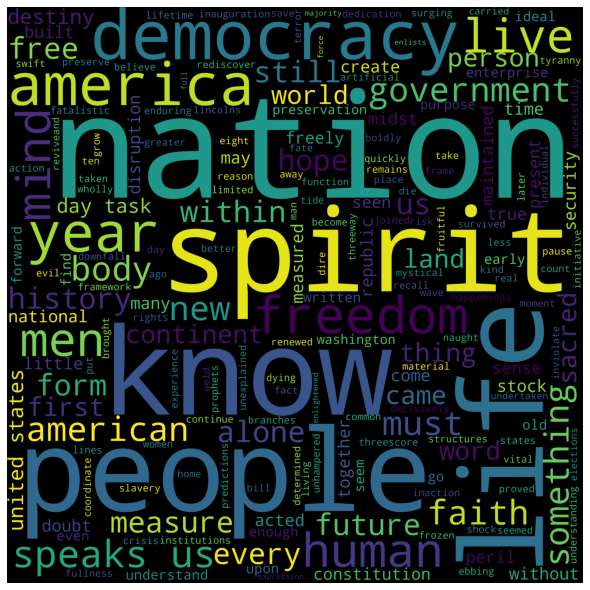

In [120]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt")
plt.show()

### Kennedy's WordCloud

In [117]:
df['Speech'].iloc[1:2]

1    vice president johnson mr speaker mr chief jus...
Name: Speech, dtype: object

In [118]:
Kennedy = df.Speech[1:2].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Kennedy

1    vice president johnson mr speaker mr chief jus...
Name: Speech, dtype: object

In [119]:
Wc_a = ' '.join(Kennedy)

Word Cloud for Kennedy


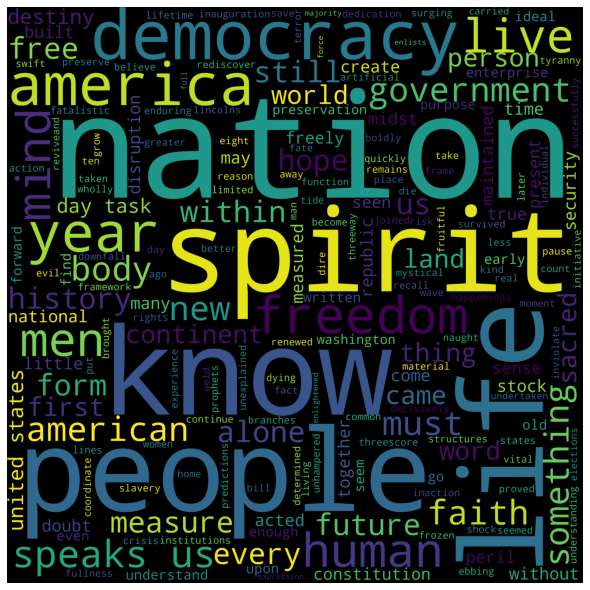

In [121]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy")
plt.show()

### Nixon's WordCloud 

In [122]:
df['Speech'].iloc[2:3]

2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [123]:
Nixon = df.Speech[2:3].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Nixon

2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [124]:
Wc_a1 = ' '.join(Nixon)

Word Cloud for Nixon


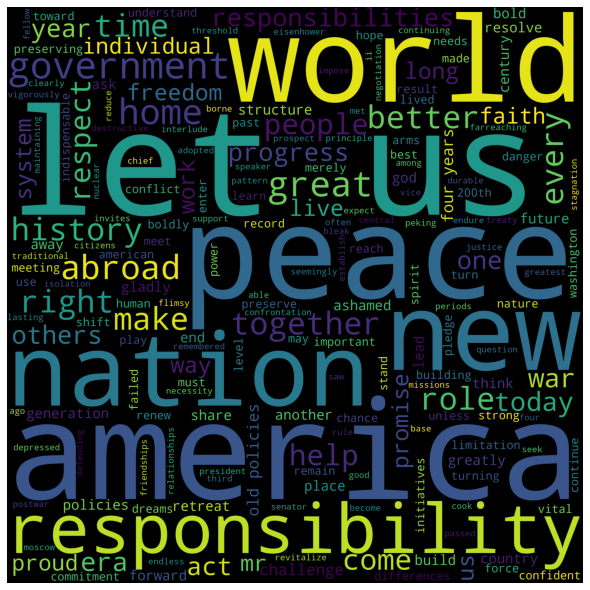

In [125]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Wc_a1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon")
plt.show()